In [ ]:
#Import all the necessary packages

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler

#importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

#Silhouette score
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/MIT - Python/Airbnb.csv")
data.head()

,host_id,host_name,host_since_year,anniversary_date,id,neighbourhood,city,state,zipcode,latitude,...,host_response_rate,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
0,1662,Chloe,2008,2021-08-11,304958,Westerpark,Amsterdam,North Holland,1053,52.373021,...,0.80,11,98.0,10.0,10.0,9.0,10.0,10.0,10.0,130
1,3159,Daniel,2008,2021-09-24,2818,Oostelijk Havengebied - Indische Buurt,Amsterdam,North Holland,NaN,52.365755,...,1.00,108,97.0,10.0,10.0,10.0,10.0,9.0,10.0,59
2,3718,Britta,2008,2021-10-19,103026,De Baarsjes - Oud-West,Amsterdam,Noord-Holland,1053,52.369388,...,1.00,15,92.0,9.0,9.0,10.0,10.0,9.0,9.0,95
3,4716,Stefan,2008,2021-11-30,550017,Centrum-Oost,Amsterdam,North Holland,1017,52.361905,...,1.00,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,100
4,5271,Tyler,2008,2021-12-17,4728389,Centrum-West,Amsterdam,Noord-Holland,1016 AM,52.371533,...,0.89,1,100.0,8.0,10.0,8.0,10.0,10.0,6.0,250


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7833 entries, 0 to 7832
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_id                      7833 non-null   int64  
 1   host_name                    7833 non-null   object 
 2   host_since_year              7833 non-null   int64  
 3   anniversary_date             7833 non-null   object 
 4   id                           7833 non-null   int64  
 5   neighbourhood                7833 non-null   object 
 6   city                         7833 non-null   object 
 7   state                        7825 non-null   object 
 8   zipcode                      7660 non-null   object 
 9   latitude                     7833 non-null   float64
 10  longitude                    7833 non-null   float64
 11  property_type                7833 non-null   object 
 12  room_type                    7833 non-null   object 
 13  accommodates      

In [ ]:
data.isnull().sum()

host_id                           0
host_name                         0
host_since_year                   0
anniversary_date                  0
id                                0
neighbourhood                     0
city                              0
state                             8
zipcode                         173
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                        69
bedrooms                         14
beds                             13
bed_type                          0
guests_included                   0
extra_people                      0
minimum_nights                    0
host_response_time              732
host_response_rate              732
number_of_reviews                 0
review_scores_rating           1698
review_scores_accuracy         1709
review_scores_cleanliness      1709
review_scores_checkin       

In [ ]:
data.isna().sum()

host_id                           0
host_name                         0
host_since_year                   0
anniversary_date                  0
id                                0
neighbourhood                     0
city                              0
state                             8
zipcode                         173
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                        69
bedrooms                         14
beds                             13
bed_type                          0
guests_included                   0
extra_people                      0
minimum_nights                    0
host_response_time              732
host_response_rate              732
number_of_reviews                 0
review_scores_rating           1698
review_scores_accuracy         1709
review_scores_cleanliness      1709
review_scores_checkin       

In [ ]:
data.duplicated().sum()

20

In [ ]:
data[data.duplicated()]

,host_id,host_name,host_since_year,anniversary_date,id,neighbourhood,city,state,zipcode,latitude,...,host_response_rate,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
22,14589,Rutger,2009,2021-04-23,738245,Centrum-West,Amsterdam,North Holland,1015,52.379354,...,NaN,8,93.0,10.0,9.0,9.0,9.0,10.0,9.0,90
78,62341,Jurgen,2009,2021-12-11,1030014,Centrum-West,Amsterdam,North Holland,1015 GN,52.381899,...,1.00,13,90.0,9.0,8.0,10.0,10.0,10.0,9.0,69
119,195126,Babette,2010,2021-08-08,1913383,Centrum-Oost,Amsterdam,North Holland,1017,52.366455,...,0.76,4,90.0,10.0,9.0,10.0,10.0,10.0,8.0,185
147,229241,Dirk,2010,2021-09-09,2079528,De Baarsjes - Oud-West,Amsterdam,North Holland,1056,52.371949,...,1.00,18,99.0,9.0,9.0,10.0,10.0,9.0,9.0,175
179,125667,MichÃ¨le,2010,2021-05-16,1018703,Zuid,Amsterdam,North Holland,1072 AW,52.350450,...,1.00,46,92.0,9.0,9.0,9.0,9.0,9.0,9.0,100
180,126790,Christopher,2010,2021-05-17,1088859,De Baarsjes - Oud-West,Amsterdam,North Holland,1054,52.367938,...,1.00,18,99.0,10.0,9.0,10.0,10.0,10.0,9.0,100
181,127233,Ingeborg,2010,2021-05-18,29554,Centrum-West,Amsterdam,NH,1013,52.380510,...,0.90,63,96.0,10.0,9.0,10.0,10.0,10.0,9.0,130
229,298957,Kate,2010,2021-11-25,61680,Centrum-West,Jordaan,North Holland,1015,52.380553,...,1.00,45,97.0,10.0,10.0,10.0,10.0,10.0,9.0,100
348,440034,Renske,2011,2021-03-13,1702822,Westerpark,Amsterdam,North Holland,1051 GT,52.383404,...,0.67,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190
452,666321,Daniel,2011,2021-06-05,136029,De Baarsjes - Oud-West,Amsterdam,North Holland,1057,52.367050,...,1.00,26,97.0,10.0,10.0,10.0,10.0,8.0,9.0,95


In [ ]:
df=data.drop_duplicates()

In [ ]:
data.shape

(7833, 32)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(7813, 32)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7813 entries, 0 to 7832
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_id                      7813 non-null   int64  
 1   host_name                    7813 non-null   object 
 2   host_since_year              7813 non-null   int64  
 3   anniversary_date             7813 non-null   object 
 4   id                           7813 non-null   int64  
 5   neighbourhood                7813 non-null   object 
 6   city                         7813 non-null   object 
 7   state                        7805 non-null   object 
 8   zipcode                      7640 non-null   object 
 9   latitude                     7813 non-null   float64
 10  longitude                    7813 non-null   float64
 11  property_type                7813 non-null   object 
 12  room_type                    7813 non-null   object 
 13  accommodates      

In [ ]:
df.count()

host_id                        7813
host_name                      7813
host_since_year                7813
anniversary_date               7813
id                             7813
neighbourhood                  7813
city                           7813
state                          7805
zipcode                        7640
latitude                       7813
longitude                      7813
property_type                  7813
room_type                      7813
accommodates                   7813
bathrooms                      7746
bedrooms                       7799
beds                           7800
bed_type                       7813
guests_included                7813
extra_people                   7813
minimum_nights                 7813
host_response_time             7083
host_response_rate             7083
number_of_reviews              7813
review_scores_rating           6118
review_scores_accuracy         6107
review_scores_cleanliness      6107
review_scores_checkin       

In [ ]:
df.isnull().sum()

host_id                           0
host_name                         0
host_since_year                   0
anniversary_date                  0
id                                0
neighbourhood                     0
city                              0
state                             8
zipcode                         173
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                        67
bedrooms                         14
beds                             13
bed_type                          0
guests_included                   0
extra_people                      0
minimum_nights                    0
host_response_time              730
host_response_rate              730
number_of_reviews                 0
review_scores_rating           1695
review_scores_accuracy         1706
review_scores_cleanliness      1706
review_scores_checkin       

In [ ]:
df.head()

,host_id,host_name,host_since_year,anniversary_date,id,neighbourhood,city,state,zipcode,latitude,...,host_response_rate,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
0,1662,Chloe,2008,2021-08-11,304958,Westerpark,Amsterdam,North Holland,1053,52.373021,...,0.80,11,98.0,10.0,10.0,9.0,10.0,10.0,10.0,130
1,3159,Daniel,2008,2021-09-24,2818,Oostelijk Havengebied - Indische Buurt,Amsterdam,North Holland,NaN,52.365755,...,1.00,108,97.0,10.0,10.0,10.0,10.0,9.0,10.0,59
2,3718,Britta,2008,2021-10-19,103026,De Baarsjes - Oud-West,Amsterdam,Noord-Holland,1053,52.369388,...,1.00,15,92.0,9.0,9.0,10.0,10.0,9.0,9.0,95
3,4716,Stefan,2008,2021-11-30,550017,Centrum-Oost,Amsterdam,North Holland,1017,52.361905,...,1.00,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,100
4,5271,Tyler,2008,2021-12-17,4728389,Centrum-West,Amsterdam,Noord-Holland,1016 AM,52.371533,...,0.89,1,100.0,8.0,10.0,8.0,10.0,10.0,6.0,250


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7813 entries, 0 to 7832
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_id                      7813 non-null   int64  
 1   host_name                    7813 non-null   object 
 2   host_since_year              7813 non-null   int64  
 3   anniversary_date             7813 non-null   object 
 4   id                           7813 non-null   int64  
 5   neighbourhood                7813 non-null   object 
 6   city                         7813 non-null   object 
 7   state                        7805 non-null   object 
 8   zipcode                      7640 non-null   object 
 9   latitude                     7813 non-null   float64
 10  longitude                    7813 non-null   float64
 11  property_type                7813 non-null   object 
 12  room_type                    7813 non-null   object 
 13  accommodates      

In [ ]:
df['city'].value_counts()

Amsterdam                                 7683
Amsterdam-Zuidoost                          35
Diemen                                      14
Jordaan                                     12
Watergraafsmeer                              9
Ãmsterdam                                   7
Amsterdam Zuid-Oost                          6
Badhoevedorp                                 4
De Pijp                                      4
Amsterdam Zuidoost                           4
Zeeburg                                      3
Amstelveen                                   3
Duivendrecht                                 3
Bos en Lommer                                2
Amsterdam                                    2
Landsmeer                                    2
Slotervaart                                  2
ÐÐ¼ÑÑ‚ÐµÑ€Ð´Ð°Ð¼                           1
Jordaan, Amsterdam                           1
Halfweg                                      1
Amsterdam, Rivierenbuurt, Scheldebuurt       1
Amsterdam / D

In [ ]:
!pip install folium --quiet

In [ ]:
import folium

In [ ]:
m = folium.Map(location = [52.365755 , 4.941419], zoom_start=10)
for index, row in df.iterrows():
  location = [row['latitude'], row['longitude']]
  popup_text = row['neighbourhood']
  folium.Marker(location=location, popup=popup_text).add_to(m)


In [ ]:
m.save('map.html')

In [ ]:
df.head()

,host_id,host_name,host_since_year,anniversary_date,id,neighbourhood,city,state,zipcode,latitude,...,host_response_rate,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
0,1662,Chloe,2008,2021-08-11,304958,Westerpark,Amsterdam,North Holland,1053,52.373021,...,0.80,11,98.0,10.0,10.0,9.0,10.0,10.0,10.0,130
1,3159,Daniel,2008,2021-09-24,2818,Oostelijk Havengebied - Indische Buurt,Amsterdam,North Holland,NaN,52.365755,...,1.00,108,97.0,10.0,10.0,10.0,10.0,9.0,10.0,59
2,3718,Britta,2008,2021-10-19,103026,De Baarsjes - Oud-West,Amsterdam,Noord-Holland,1053,52.369388,...,1.00,15,92.0,9.0,9.0,10.0,10.0,9.0,9.0,95
3,4716,Stefan,2008,2021-11-30,550017,Centrum-Oost,Amsterdam,North Holland,1017,52.361905,...,1.00,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,100
4,5271,Tyler,2008,2021-12-17,4728389,Centrum-West,Amsterdam,Noord-Holland,1016 AM,52.371533,...,0.89,1,100.0,8.0,10.0,8.0,10.0,10.0,6.0,250


In [ ]:
df_new = df.copy()

In [ ]:
df_new.head()

,host_id,host_name,host_since_year,anniversary_date,id,neighbourhood,city,state,zipcode,latitude,...,host_response_rate,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
0,1662,Chloe,2008,2021-08-11,304958,Westerpark,Amsterdam,North Holland,1053,52.373021,...,0.80,11,98.0,10.0,10.0,9.0,10.0,10.0,10.0,130
1,3159,Daniel,2008,2021-09-24,2818,Oostelijk Havengebied - Indische Buurt,Amsterdam,North Holland,NaN,52.365755,...,1.00,108,97.0,10.0,10.0,10.0,10.0,9.0,10.0,59
2,3718,Britta,2008,2021-10-19,103026,De Baarsjes - Oud-West,Amsterdam,Noord-Holland,1053,52.369388,...,1.00,15,92.0,9.0,9.0,10.0,10.0,9.0,9.0,95
3,4716,Stefan,2008,2021-11-30,550017,Centrum-Oost,Amsterdam,North Holland,1017,52.361905,...,1.00,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,100
4,5271,Tyler,2008,2021-12-17,4728389,Centrum-West,Amsterdam,Noord-Holland,1016 AM,52.371533,...,0.89,1,100.0,8.0,10.0,8.0,10.0,10.0,6.0,250


#**Working on the city column of the dataset**

In [ ]:
# Given word to check and the replacement word
target_word = 'Amsterdam'
replacement_word = 'Amsterdam'

# Convert target word and column entries to lowercase (or uppercase)
target_word_lower = target_word.lower()
df_new['city_lower'] = df_new['city'].str.lower()

# Function to replace the entire string with the replacement word if the target word is present
def replace_string(row):
    if target_word_lower in row:
        return replacement_word
    else:
        return row

# Apply the custom function to the 'column_name_lower' column
df_new['city'] = df_new['city_lower'].apply(lambda x: replace_string(x))

# Drop the temporary lowercase column
df_new.drop(columns=['city_lower'], inplace=True)

# Print the updated DataFrame
df_new

,host_id,host_name,host_since_year,anniversary_date,id,neighbourhood,city,state,zipcode,latitude,...,host_response_rate,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
0,1662,Chloe,2008,2021-08-11,304958,Westerpark,Amsterdam,North Holland,1053,52.373021,...,0.80,11,98.0,10.0,10.0,9.0,10.0,10.0,10.0,130
1,3159,Daniel,2008,2021-09-24,2818,Oostelijk Havengebied - Indische Buurt,Amsterdam,North Holland,NaN,52.365755,...,1.00,108,97.0,10.0,10.0,10.0,10.0,9.0,10.0,59
2,3718,Britta,2008,2021-10-19,103026,De Baarsjes - Oud-West,Amsterdam,Noord-Holland,1053,52.369388,...,1.00,15,92.0,9.0,9.0,10.0,10.0,9.0,9.0,95
3,4716,Stefan,2008,2021-11-30,550017,Centrum-Oost,Amsterdam,North Holland,1017,52.361905,...,1.00,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,100
4,5271,Tyler,2008,2021-12-17,4728389,Centrum-West,Amsterdam,Noord-Holland,1016 AM,52.371533,...,0.89,1,100.0,8.0,10.0,8.0,10.0,10.0,6.0,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7828,30574000,Kathleen,2015,2021-04-04,5887073,Oostelijk Havengebied - Indische Buurt,Amsterdam,Noord-Holland,1019 SG,52.379848,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150
7829,30575462,James,2015,2021-04-04,5887362,Centrum-West,Amsterdam,Noord-Holland,1012 KC,52.373175,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160
7830,30592860,Ruud,2015,2021-04-04,5896701,Centrum-Oost,Amsterdam,Noord-Holland,1011,52.371165,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165
7831,30593666,Trevelbadi,2015,2021-04-04,5891027,Noord-West,Amsterdam,Noord-Holland,1035,52.414229,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70


In [ ]:
df_new['city'].value_counts()

Amsterdam             7740
diemen                  14
jordaan                 12
watergraafsmeer          9
ãmsterdam               7
de pijp                  4
badhoevedorp             4
amstelveen               3
zeeburg                  3
duivendrecht             3
bos en lommer            2
slotervaart              2
landsmeer                2
é˜¿å§†æ–¯ç‰¹ä¸¹          1
nederland                1
halfweg                  1
osdorp                   1
north holland            1
amsterddam               1
wz                       1
ðð¼ññ‚ðµñ€ð´ð°ð¼       1
Name: city, dtype: int64

In [ ]:
change = ['jordaan','watergraafsmeer','de pijp', 'zeeburg','slotervaart','osdorp','landsmeer','bos en lommer','ãmsterdam','amsterddam']

In [ ]:
for x in df_new['city']:
  if x in change:
    df_new['city'].replace(x, "Amsterdam", inplace=True)
  else:
    pass

In [ ]:
df_new['city'].value_counts()

Amsterdam             7783
diemen                  14
badhoevedorp             4
amstelveen               3
duivendrecht             3
wz                       1
north holland            1
halfweg                  1
nederland                1
é˜¿å§†æ–¯ç‰¹ä¸¹          1
ðð¼ññ‚ðµñ€ð´ð°ð¼       1
Name: city, dtype: int64

In [ ]:
# Selecting cities where city is not equal to "Amsterdam" and storing them in a list
cities_list = df_new['city'][df_new['city'] != 'Amsterdam'].tolist()

In [ ]:
#Length of cities_list
len(cities_list)

30

In [ ]:
#Since all the cities other than Amsterdamn are only 30 in number we will add them in 1 group and name it others.
df_new['city'].replace(cities_list, "others", inplace=True)

In [ ]:
df_new['city'].value_counts()

Amsterdam    7783
others         30
Name: city, dtype: int64

In [ ]:
df_new.shape

(7813, 32)

#**Working on the neighbourhood column of the dataset**

In [ ]:
value_counts = df_new['neighbourhood'].value_counts()

In [ ]:
value_counts

Centrum-West                              1421
De Baarsjes - Oud-West                    1197
Centrum-Oost                               917
De Pijp - Rivierenbuurt                    906
Westerpark                                 686
Zuid                                       577
Oud-Oost                                   409
Bos en Lommer                              339
Oostelijk Havengebied - Indische Buurt     338
Oud-Noord                                  206
Watergraafsmeer                            179
Slotervaart                                142
IJburg - Zeeburgereiland                   101
Buitenveldert - Zuidas                      84
Noord-West                                  72
Geuzenveld - Slotermeer                     58
Noord-Oost                                  47
De Aker - Nieuw Sloten                      42
Osdorp                                      41
Bijlmer-Centrum                             24
Bijlmer-Oost                                17
Gaasperdam - 

In [ ]:
entries_to_rename = []
entries_to_rename = value_counts[value_counts < 400].index.tolist()
entries_to_rename

['Bos en Lommer',
 'Oostelijk Havengebied - Indische Buurt',
 'Oud-Noord',
 'Watergraafsmeer',
 'Slotervaart',
 'IJburg - Zeeburgereiland',
 'Buitenveldert - Zuidas',
 'Noord-West',
 'Geuzenveld - Slotermeer',
 'Noord-Oost',
 'De Aker - Nieuw Sloten',
 'Osdorp',
 'Bijlmer-Centrum',
 'Bijlmer-Oost',
 'Gaasperdam - Driemond']

In [ ]:
for x in df_new['neighbourhood']:
  #print(x)
  if x in entries_to_rename:
    df_new['neighbourhood'].replace(x,"others", inplace=True)
  else:
    pass

In [ ]:
df_new['neighbourhood'].value_counts()

others                     1700
Centrum-West               1421
De Baarsjes - Oud-West     1197
Centrum-Oost                917
De Pijp - Rivierenbuurt     906
Westerpark                  686
Zuid                        577
Oud-Oost                    409
Name: neighbourhood, dtype: int64

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7813 entries, 0 to 7832
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_id                      7813 non-null   int64  
 1   host_name                    7813 non-null   object 
 2   host_since_year              7813 non-null   int64  
 3   anniversary_date             7813 non-null   object 
 4   id                           7813 non-null   int64  
 5   neighbourhood                7813 non-null   object 
 6   city                         7813 non-null   object 
 7   state                        7805 non-null   object 
 8   zipcode                      7640 non-null   object 
 9   latitude                     7813 non-null   float64
 10  longitude                    7813 non-null   float64
 11  property_type                7813 non-null   object 
 12  room_type                    7813 non-null   object 
 13  accommodates      

We will drop all the location column from the database apart from city,neighbourhood, longitude and lattitude.

we will create 2 seperate dataset, one with longitude latitude varaible for location

and other with city and neighbourhood.

In [ ]:
df_city = df_new.copy()

In [ ]:
df_city.columns

Index(['host_id', 'host_name', 'host_since_year', 'anniversary_date', 'id',
       'neighbourhood', 'city', 'state', 'zipcode', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'guests_included', 'extra_people', 'minimum_nights',
       'host_response_time', 'host_response_rate', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'price'],
      dtype='object')

In [ ]:
drop_column = ['state','zipcode','latitude', 'longitude']
df_city.drop(columns = drop_column,inplace=True)

In [ ]:
df_city.shape

(7813, 28)

In [ ]:
df_coordinates = df_new.copy()

In [ ]:
drop_column = ['state','zipcode','neighbourhood', 'city']
df_coordinates.drop(columns = drop_column,inplace=True)

In [ ]:
df_coordinates.shape

(7813, 28)

#Fom here on we will work with df_city dataset

In [ ]:
df_city.columns

Index(['host_id', 'host_name', 'host_since_year', 'anniversary_date', 'id',
       'neighbourhood', 'city', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'guests_included',
       'extra_people', 'minimum_nights', 'host_response_time',
       'host_response_rate', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'price'],
      dtype='object')

In [ ]:
drop_column= ['host_id', 'host_name','id']#dropping columns that we are not going to use.
df_city.drop(columns=drop_column,inplace=True)

In [ ]:
df_city.shape

(7813, 25)

#**Host Since Year**
#Lets work on column host since year, we will convert the value given here into numbers of years since host is listing Airbnb properties.

In [ ]:
df_city['host_since_year'].value_counts()

2013    2483
2014    2403
2012    1623
2011     660
2015     399
2010     215
2009      23
2008       7
Name: host_since_year, dtype: int64

In [ ]:
import datetime

In [ ]:
today = datetime.datetime.today().year
today

2023

In [ ]:
df_city['host_since_year']=today-df_city['host_since_year']

In [ ]:
df_city['host_since_year'].value_counts()

10    2483
9     2403
11    1623
12     660
8      399
13     215
14      23
15       7
Name: host_since_year, dtype: int64

In [ ]:
df_city.rename(columns={'host_since_year':'host_age'},inplace=True)

In [ ]:
df_city.columns

Index(['host_age', 'anniversary_date', 'neighbourhood', 'city',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'guests_included', 'extra_people', 'minimum_nights',
       'host_response_time', 'host_response_rate', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'price'],
      dtype='object')

We have changed the host since year data to how old host is on AIRBNB website and have also chnaged the name of the column "host since year" to "host_age".

#**Anniversary date**

Lets work on column anniversary date.

In [ ]:
#converting to datetime datatype
df_city['anniversary_date']=pd.to_datetime(df_city['anniversary_date'])

In [ ]:
date = df_city['anniversary_date'].max()
date

Timestamp('2029-02-01 00:00:00')

In [ ]:
#Extracting year and storing in new column
df_city['property_age'] = df_city['anniversary_date'].dt.year
df_city[['anniversary_date','property_age']].sample(5)

,anniversary_date,property_age
3454,2021-05-20,2021
4868,2021-12-01,2021
7731,2021-03-15,2021
3156,2021-04-05,2021
2290,2021-11-01,2021


In [ ]:
df_city['property_age'].value_counts()

2021    7786
2029      27
Name: property_age, dtype: int64

In [ ]:
#Checking for the entries made for year 2029 using original datatset.
date1 = df['anniversary_date'].max()
df[df["anniversary_date"]==date1]

,host_id,host_name,host_since_year,anniversary_date,id,neighbourhood,city,state,zipcode,latitude,...,host_response_rate,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
1042,1829492,Fred & Wietske,2012,2029-02-01,1034129,De Pijp - Rivierenbuurt,Amsterdam,North Holland,1072 NL,52.352623,...,0.96,13,91.0,8.0,9.0,10.0,9.0,9.0,9.0,240
1043,1829492,Fred & Wietske,2012,2029-02-01,5387855,De Baarsjes - Oud-West,Amsterdam,Noord-Holland,1054 ZH,52.366310,...,0.96,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220
1044,1829492,Fred & Wietske,2012,2029-02-01,5755553,Zuid,Amsterdam,Noord-Holland,1071,52.352322,...,0.96,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280
1045,1829492,Fred & Wietske,2012,2029-02-01,439082,De Pijp - Rivierenbuurt,Amsterdam,North Holland,1072,52.356436,...,0.96,63,99.0,10.0,10.0,10.0,10.0,10.0,10.0,165
1046,1829492,Fred & Wietske,2012,2029-02-01,1341241,Zuid,Amsterdam,North Holland,1076 CJ,52.344116,...,0.96,2,91.0,8.0,10.0,9.0,9.0,10.0,9.0,145
1047,1829492,Fred & Wietske,2012,2029-02-01,1703361,Centrum-West,Amsterdam,North Holland,1017 NB,52.365708,...,0.96,12,90.0,9.0,9.0,9.0,10.0,10.0,8.0,165
1048,1829492,Fred & Wietske,2012,2029-02-01,616730,De Pijp - Rivierenbuurt,Amsterdam,North Holland,1072,52.356122,...,0.96,14,91.0,10.0,9.0,9.0,10.0,10.0,9.0,150
1049,1829492,Fred & Wietske,2012,2029-02-01,834588,De Baarsjes - Oud-West,Amsterdam,North Holland,1054,52.359470,...,0.96,26,95.0,10.0,9.0,9.0,10.0,9.0,9.0,180
1050,1829492,Fred & Wietske,2012,2029-02-01,3699518,Centrum-Oost,Amsterdam,North Holland,1011 TZ,52.372073,...,0.96,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,130
1051,1829492,Fred & Wietske,2012,2029-02-01,2449350,Centrum-Oost,Amsterdam,North Holland,NaN,52.362380,...,0.96,9,91.0,8.0,8.0,8.0,9.0,10.0,8.0,150


There are only 27 properties with anniversary date as 2029 year and surprisingly all these property belongs to same proper Fred & Wietske, could be the year was 2020 which by mistake they entered 2029,
Also since all the properties are with 12 months span, this column will not really help us in data analysis and model building, so we will drop avviversary day column.

In [ ]:
#dropping the property age and anniversary column.
columns = ['anniversary_date','property_age']
df_city.drop(columns = columns, inplace=True)

In [ ]:
df_city.shape

(7813, 24)

#**Bedrooms,Bathrooms,beds**

In [ ]:
#calculating the percentage of missing values in each column.
df_city.isnull().mean()*100

host_age                        0.000000
neighbourhood                   0.000000
city                            0.000000
property_type                   0.000000
room_type                       0.000000
accommodates                    0.000000
bathrooms                       0.857545
bedrooms                        0.179189
beds                            0.166389
bed_type                        0.000000
guests_included                 0.000000
extra_people                    0.000000
minimum_nights                  0.000000
host_response_time              9.343402
host_response_rate              9.343402
number_of_reviews               0.000000
review_scores_rating           21.694612
review_scores_accuracy         21.835403
review_scores_cleanliness      21.835403
review_scores_checkin          21.822603
review_scores_communication    21.861001
review_scores_location         21.835403
review_scores_value            21.861001
price                           0.000000
dtype: float64

Since there is leass than 5% of missing values present in bathrooms, beds and bedrooms column we can inpute these column with mean or median.
We will check the PDF curve before and after imputing the missinf value with the mean and median and will analyse if it makes any difference.

In [ ]:
df_city.isnull().sum()

host_age                          0
neighbourhood                     0
city                              0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                        67
bedrooms                         14
beds                             13
bed_type                          0
guests_included                   0
extra_people                      0
minimum_nights                    0
host_response_time              730
host_response_rate              730
number_of_reviews                 0
review_scores_rating           1695
review_scores_accuracy         1706
review_scores_cleanliness      1706
review_scores_checkin          1705
review_scores_communication    1708
review_scores_location         1706
review_scores_value            1708
price                             0
dtype: int64

In [ ]:
#calculting and stoing mean and median values for columns beds, bedrooms, bathrooms.
mean_bathrooms = df_city['bathrooms'].mean()
median_bathrooms = df_city['bathrooms'].median()

mean_bedrooms = df_city['bedrooms'].mean()
median_bedrooms = df_city['bedrooms'].median()

mean_beds = df_city['beds'].mean()
median_beds = df_city['beds'].median()

In [ ]:
#createing columns with imputed mean and median of beds, bedrooms, bathrooms.
df_city['bathrooms_mean']=df_city['bathrooms'].fillna(mean_bathrooms)
df_city['bathrooms_median']=df_city['bathrooms'].fillna(median_bathrooms)

df_city['bedrooms_mean']=df_city['bedrooms'].fillna(mean_bedrooms)
df_city['bedrooms_median']=df_city['bedrooms'].fillna(median_bedrooms)

df_city['beds_mean']=df_city['beds'].fillna(mean_beds)
df_city['beds_median']=df_city['beds'].fillna(median_beds)

We will check and compare the variance in the imputed column with the original columns.

In [ ]:
#check and compare the variance in the imputed column with the original columns.
print(f"bathrooms_variance = {df_city['bathrooms'].var()}")
print(f"bathrooms_mean_variance = {df_city['bathrooms_mean'].var()}")
print(f"bathrooms_median_variance = {df_city['bathrooms_median'].var()}\n")



print(f"bedrooms_variance = {df_city['bedrooms'].var()}")
print(f"bedrooms_mean_variance = {df_city['bedrooms_mean'].var()}")
print(f"bedrooms_median_variance = {df_city['bedrooms_median'].var()}\n")



print(f"beds_variance = {df_city['beds'].var()}")
print(f"beds_mean_variance = {df_city['beds_mean'].var()}")
print(f"beds_median_variance = {df_city['beds_median'].var()}")


bathrooms_variance = 0.15622112464551977
bathrooms_mean_variance = 0.15488128653092045
bathrooms_median_variance = 0.1549900355788392

bedrooms_variance = 0.7857749106074685
bedrooms_mean_variance = 0.7843667118429393
bedrooms_median_variance = 0.7846748847500283

beds_variance = 2.739337324640569
beds_mean_variance = 2.7347787755852275
beds_median_variance = 2.736388549576247


The variance for all the 3 variables remains almost same even after imputing with mean and median, which means the missing values were random, now we will also check the density plot.

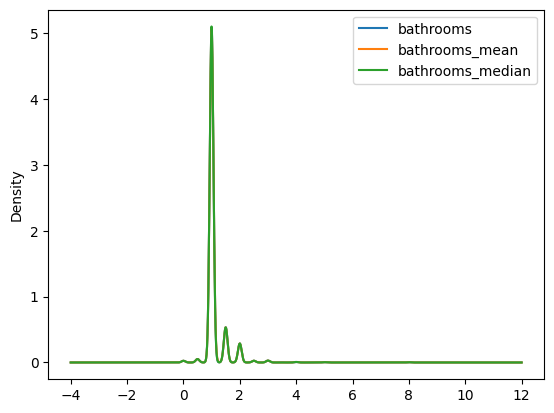

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original bathrooms distribution
df_city['bathrooms'].plot(kind='kde', ax = ax)

#variable imputed with mean
df_city['bathrooms_mean'].plot(kind='kde', ax=ax)

#variable imputed with median
df_city['bathrooms_median'].plot(kind='kde', ax=ax)

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')



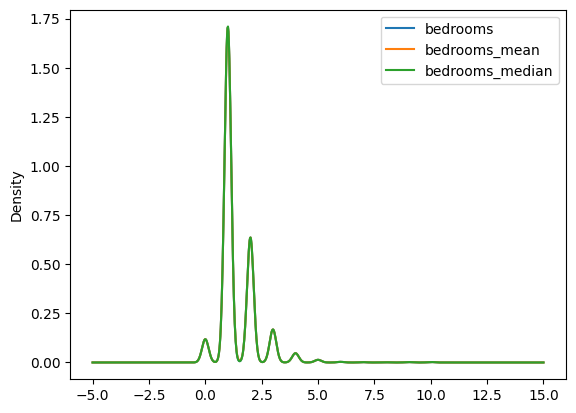

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original bedrooms distribution
df_city['bedrooms'].plot(kind='kde', ax = ax)

#variable imputed with mean
df_city['bedrooms_mean'].plot(kind='kde', ax=ax)

#variable imputed with median
df_city['bedrooms_median'].plot(kind='kde', ax=ax)

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')


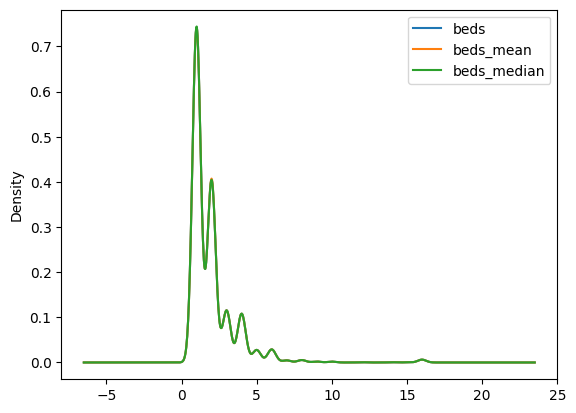

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original beds distribution
df_city['beds'].plot(kind='kde', ax = ax)

#variable imputed with mean
df_city['beds_mean'].plot(kind='kde', ax=ax)

#variable imputed with median
df_city['beds_median'].plot(kind='kde', ax=ax)

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

<Axes: >

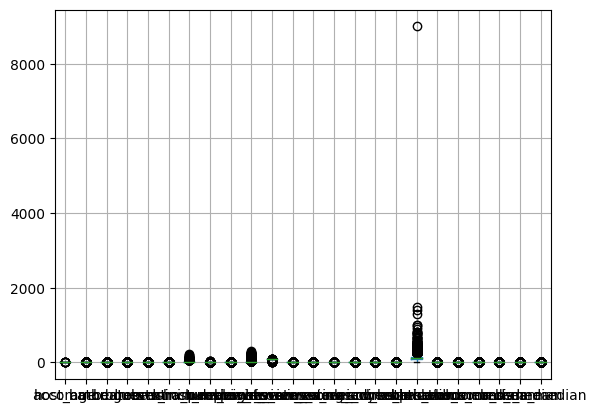

In [ ]:
df_city.boxplot()

The density plot of the original 3 variables and variables after imputation with mean and median also remains same, which means imputing with mean and median does not distrupt the original distribution of the variable.
Hence we can will impute these variables with their Median value.

In [ ]:
# Columns to impute
reqd_col_for_impute = ['bathrooms','bedrooms','beds']

# Simple Imputer with Mode
imputer = SimpleImputer(strategy="median")

# Fit and transform df_city
df_city[reqd_col_for_impute] = imputer.fit_transform(df_city[reqd_col_for_impute])

#drop Mean and Median columns created.
drop_column = ['bathrooms_mean','bathrooms_median','bedrooms_mean','bedrooms_median','beds_mean','beds_median',]
df_city.drop(columns = drop_column,inplace=True)

df_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7813 entries, 0 to 7832
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_age                     7813 non-null   int64  
 1   neighbourhood                7813 non-null   object 
 2   city                         7813 non-null   object 
 3   property_type                7813 non-null   object 
 4   room_type                    7813 non-null   object 
 5   accommodates                 7813 non-null   int64  
 6   bathrooms                    7813 non-null   float64
 7   bedrooms                     7813 non-null   float64
 8   beds                         7813 non-null   float64
 9   bed_type                     7813 non-null   object 
 10  guests_included              7813 non-null   int64  
 11  extra_people                 7813 non-null   int64  
 12  minimum_nights               7813 non-null   int64  
 13  host_response_time

#Now lets analyse variables Property type, Room type, Bed_type

In [ ]:
#distribution og each variable in %
column = ['property_type','room_type','bed_type']

for i in column:
  print(f"{(df_city[i].value_counts())/(df_city[i].count())*100}\n\n")

Apartment          80.148470
House               9.087418
Bed & Breakfast     4.735697
Boat                4.172533
Loft                0.985537
Other               0.371176
Cabin               0.153590
Camper/RV           0.140791
Villa               0.102393
Yurt                0.025598
Dorm                0.025598
Chalet              0.012799
Earth House         0.012799
Treehouse           0.012799
Hut                 0.012799
Name: property_type, dtype: float64


Entire home/apt    80.468450
Private room       18.942788
Shared room         0.588762
Name: room_type, dtype: float64


Real Bed         98.156918
Pull-out Sofa     1.203123
Futon             0.332779
Airbed            0.166389
Couch             0.140791
Name: bed_type, dtype: float64




##**Property type**
- This variable signifies which type of property it is, and in total there were 15 different types of properties.
- It was observed that almost 80% of the properties were “Apartment” type properties.
- Property types with count on the lesser side was merged into single unique value “Other”
By doing so 6 unique property types were extracted which were as follows:
1.	Apartment
2.	House
3.	Bed & Breakfast
4.	Boat
6.	Other

##**room type**
- “room_type” variable signifies the type of rooms the property has; it has three unique values: “Entire home/apt”, “Private room”, “Shared room”.
- Private room and Shared room were merged into one single unique value “Private/Shared rooms” as their count was pretty low.
By doing so 2 unique room types were extracted which were as follows:
1.	Entire home/apt

2.	Private/Shared rooms.


##**bed type**
- “bed_type” variable signifies the type of beds available at the property.

- Count of real beds is on the higher side and the rest of the bed types have a pretty small count; therefore, they are merged into one single unique value “Other”.
By doing so 2 unique bed types were extracted which were as follows:
1.	Real Bed
2.	Other



In [ ]:
#entries to rename
prop_type=['Loft', 'Other', 'Cabin','Camper/RV', 'Villa', 'Yurt', 'Dorm', 'Chalet', 'Earth House', 'Treehouse', 'Hut']
for x in df_city['property_type']:

  if x in prop_type:
    df_city['property_type'].replace(x,"others", inplace=True)#Putting all the property type less than 4% into "Others" property type.
  else:
    pass


In [ ]:
#df_city['property_type'].value_counts()
print(f"{(df_city['property_type'].value_counts())/(df_city['property_type'].count())*100}\n\n")

Apartment          80.148470
House               9.087418
Bed & Breakfast     4.735697
Boat                4.172533
others              1.855881
Name: property_type, dtype: float64




In [ ]:
#Converting all the private room and shared room into one column Private room/Shared room.
df_city['room_type'].replace(['Private room','Private room/Shared room'],'Private room/Shared room', inplace=True)

In [ ]:
print(f"{(df_city['room_type'].value_counts())/(df_city['room_type'].count())*100}\n\n")

Entire home/apt             80.468450
Private room/Shared room    18.942788
Shared room                  0.588762
Name: room_type, dtype: float64




In [ ]:
#Putting all the categories other than 'Real Bed' into 'Others' category.
#Pull-out Sofa, Futon, Airbed, Couch

df_city['bed_type'].replace(['Pull-out Sofa', 'Sofa', 'Futon', 'Airbed', 'Couch'],'Others', inplace=True)

In [ ]:
print(f"{(df_city['bed_type'].value_counts())/(df_city['bed_type'].count())*100}\n\n")

Real Bed    98.156918
Others       1.843082
Name: bed_type, dtype: float64




In [ ]:
#distribution og each variable in %
column = ['property_type','room_type','bed_type']

for i in column:
  print(f"{(df_city[i].value_counts())/(df_city[i].count())*100}\n\n")

Apartment          80.148470
House               9.087418
Bed & Breakfast     4.735697
Boat                4.172533
others              1.855881
Name: property_type, dtype: float64


Entire home/apt             80.468450
Private room/Shared room    18.942788
Shared room                  0.588762
Name: room_type, dtype: float64


Real Bed    98.156918
Others       1.843082
Name: bed_type, dtype: float64




In [ ]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7813 entries, 0 to 7832
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_age                     7813 non-null   int64  
 1   neighbourhood                7813 non-null   object 
 2   city                         7813 non-null   object 
 3   property_type                7813 non-null   object 
 4   room_type                    7813 non-null   object 
 5   accommodates                 7813 non-null   int64  
 6   bathrooms                    7813 non-null   float64
 7   bedrooms                     7813 non-null   float64
 8   beds                         7813 non-null   float64
 9   bed_type                     7813 non-null   object 
 10  guests_included              7813 non-null   int64  
 11  extra_people                 7813 non-null   int64  
 12  minimum_nights               7813 non-null   int64  
 13  host_response_time

##Next we will focus on variables **accommodates, guests_included, extra_people, minimum nights**. These variables are numerical with no missing values, but we will check for any outliers presents in these variables.

In [ ]:
df_city[['accommodates','guests_included','extra_people','minimum_nights']].nunique()

accommodates       14
guests_included    13
extra_people       74
minimum_nights     22
dtype: int64

accommodates
Skew : 3.16
Mean: 3.12
Median: 2.0


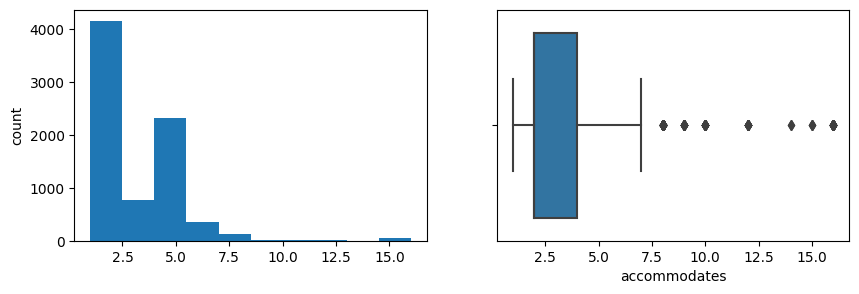

guests_included
Skew : 3.73
Mean: 1.64
Median: 1.0


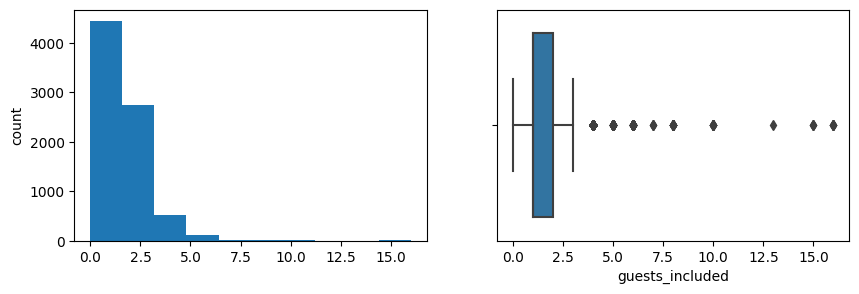

extra_people
Skew : 1.95
Mean: 13.62
Median: 0.0


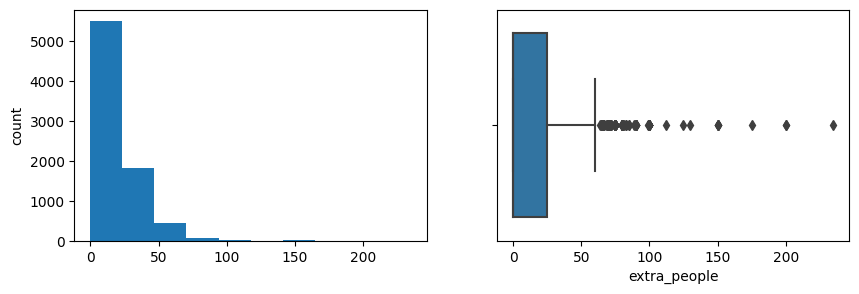

minimum_nights
Skew : 4.37
Mean: 2.51
Median: 2.0


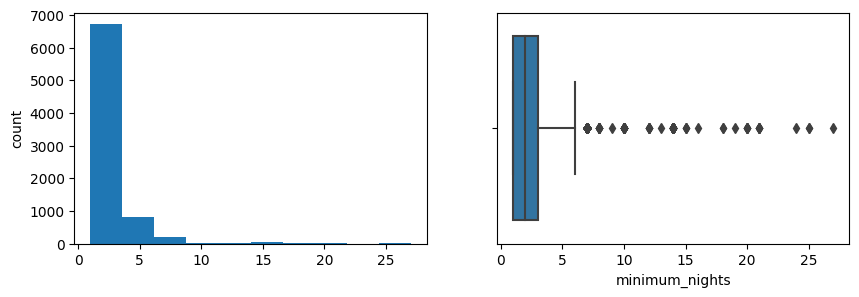

price
Skew : 43.44
Mean: 129.02
Median: 109.0


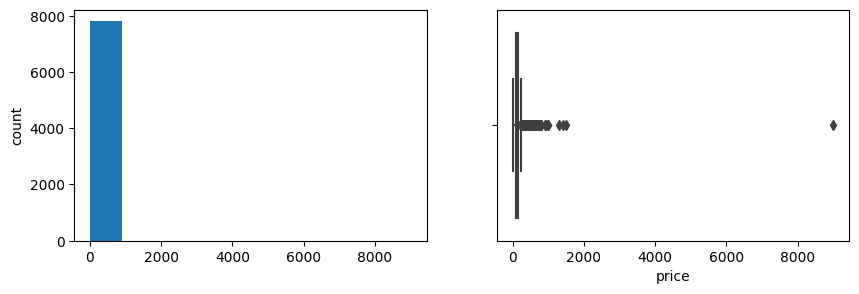

In [ ]:
cols = ['accommodates','guests_included','extra_people','minimum_nights','price']
for col in cols:
    print(col)
    print('Skew :',round(df_city[col].skew(),2))
    print('Mean:',round(df_city[col].mean(),2))
    print('Median:',round(df_city[col].median(),2))
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

All the above variables have some otliers in them , we will look at them 1 by 1.

##**Accomodates**

Accomodates have some outliers at upper bound, by the definition of this column means Count for individuals which the property can host, which means total number of individuls which can stay in the property.
The mean is 3.12 and median is 2. In real time scenario, it is possible for a airbnb property to host mora than 3 or 4 number of people, it totally depends on the size and number of beds in the propert.
Hence we will leave these outliers as it is as it may help in deciding the cost of the property per night.
Tourist group with large number of peolple, like family or group of friends will prefer such properties and would be willing to pay extra.

##**Guests included**
This is permissible guests count in the property, and it possible to have more than 2 or 3 numbers of guests in the property. SO we will leave these outliers as it is.


##**Extra_people**
By definition this varibale means Count for extra people which the property can host. This variable is not clear in its information and has lot of outliers, it seems similar to column accomodates. The median for this column is 0, which implies most properties do not allow any extra people in the property, so we will drop this column from our analysis as it dosent seem to add any valuable imformation to the analysis.

##**Minimum Nights**

Minimum nights means minimum number of nights for which property is available for renting, There are some outliers on the upper bound o the boxplot. The median value is 2.
Having outliers for these varibale is possible, on Airbnb there are many properties which are availble to be rented out for minimum of 30 days, this is the rule set by the owner and airbnb allows owner to offer property for minimum of this time, hence we will not remove the outliers from this variable as well.

##**Price**

The proce of the property os out dependent variable here and there are many outliers present on upper bound of the box plot, but there is one lying at he extrme left end which dosent seem right. we will treat this outlie.

In [ ]:

df_city["price"].sort_values(ascending=False).head(5)

4092    9000
4976    1495
2343    1400
6927    1305
7737    1000
Name: price, dtype: int64

We will treat this topmost outlier value of Euro 9000 and will make it as the second larget i.e. Euro 1495.

In [ ]:
#replacing 9000 with 1495.
df_city["price"].replace(9000,1495,inplace=True)

In [ ]:
df_city["price"].sort_values(ascending=False).head()

4092    1495
4976    1495
2343    1400
6927    1305
7737    1000
Name: price, dtype: int64

In [ ]:
df_city.drop(columns="extra_people",inplace=True)

In [ ]:
df_city.shape[1]

23

##**Review columns**

We will now work upon review column and treat all the missing values in it.

In [ ]:
#Storing all the review column into a list
review_columns = df_city.iloc[:,-11:-1].columns.tolist()

In [ ]:
#calculating the number of missing value in each review columns.
for i in review_columns:
  print(f"{i} = {df_city[i].isnull().sum()}")

host_response_time = 730
host_response_rate = 730
number_of_reviews = 0
review_scores_rating = 1695
review_scores_accuracy = 1706
review_scores_cleanliness = 1706
review_scores_checkin = 1705
review_scores_communication = 1708
review_scores_location = 1706
review_scores_value = 1708


In [ ]:
df_city_coppy=df_city[review_columns].copy()
df_city_coppy.drop(columns="host_response_time",inplace=True)
df_city_coppy.columns
df_city_coppy.isnull().sum()

host_response_rate              730
number_of_reviews                 0
review_scores_rating           1695
review_scores_accuracy         1706
review_scores_cleanliness      1706
review_scores_checkin          1705
review_scores_communication    1708
review_scores_location         1706
review_scores_value            1708
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer

knn = KNNImputer()

imputed_data = knn.fit_transform(df_city_coppy)
imputed_data = pd.DataFrame(imputed_data)
imputed_data.columns=df_city_coppy.columns
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_rate           7813 non-null   float64
 1   number_of_reviews            7813 non-null   float64
 2   review_scores_rating         7813 non-null   float64
 3   review_scores_accuracy       7813 non-null   float64
 4   review_scores_cleanliness    7813 non-null   float64
 5   review_scores_checkin        7813 non-null   float64
 6   review_scores_communication  7813 non-null   float64
 7   review_scores_location       7813 non-null   float64
 8   review_scores_value          7813 non-null   float64
dtypes: float64(9)
memory usage: 549.5 KB


In [ ]:
imputed_data.isnull().sum()

host_response_rate             0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
dtype: int64

In [ ]:
#resetting the index of df_city to match it with imputed_data index
df_city.reset_index(drop=True, inplace=True)
df_city.index

RangeIndex(start=0, stop=7813, step=1)

In [ ]:
imputed_data.index

RangeIndex(start=0, stop=7813, step=1)

In [ ]:
lst = imputed_data.columns
df_city[lst]=imputed_data[lst]


In [ ]:
df_city.isnull().sum()

host_age                         0
neighbourhood                    0
city                             0
property_type                    0
room_type                        0
accommodates                     0
bathrooms                        0
bedrooms                         0
beds                             0
bed_type                         0
guests_included                  0
minimum_nights                   0
host_response_time             730
host_response_rate               0
number_of_reviews                0
review_scores_rating             0
review_scores_accuracy           0
review_scores_cleanliness        0
review_scores_checkin            0
review_scores_communication      0
review_scores_location           0
review_scores_value              0
price                            0
dtype: int64

Our Last column left is host_response_time.
Thinking logically, missing value are in the rows where host never replies to customer quireies, so in missing values should be imputed with "no reply"

In [ ]:
df_city['host_response_time'].value_counts()

within a few hours    2743
within an hour        2127
within a day          2030
a few days or more     183
Name: host_response_time, dtype: int64

In [ ]:
df_city['host_response_time'].fillna('no response', inplace=True)

In [ ]:
df_city['host_response_time'].value_counts()

within a few hours    2743
within an hour        2127
within a day          2030
no response            730
a few days or more     183
Name: host_response_time, dtype: int64

In [ ]:
df_city.isnull().sum()

host_age                       0
neighbourhood                  0
city                           0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
bed_type                       0
guests_included                0
minimum_nights                 0
host_response_time             0
host_response_rate             0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
price                          0
dtype: int64

Our data is clean and ready to be worked upon for data analysis.